In [346]:
# !pip freeze
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install sklearn
# !pip3 install matplotlib
# !pip3 install pydotplus
# !pip3 install six


In [347]:
# read csv file
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('cleaned_processed.cleveland.data', header = None)
df.head()

Saving dataset4.txt to dataset4 (34).txt


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Best hyperparameter for this case: {'criterion': 'gini', 'max_depth': 3}
---------------------------
Model A via Gini
Accuracy of this decision tree is 0.83333
---------------------------


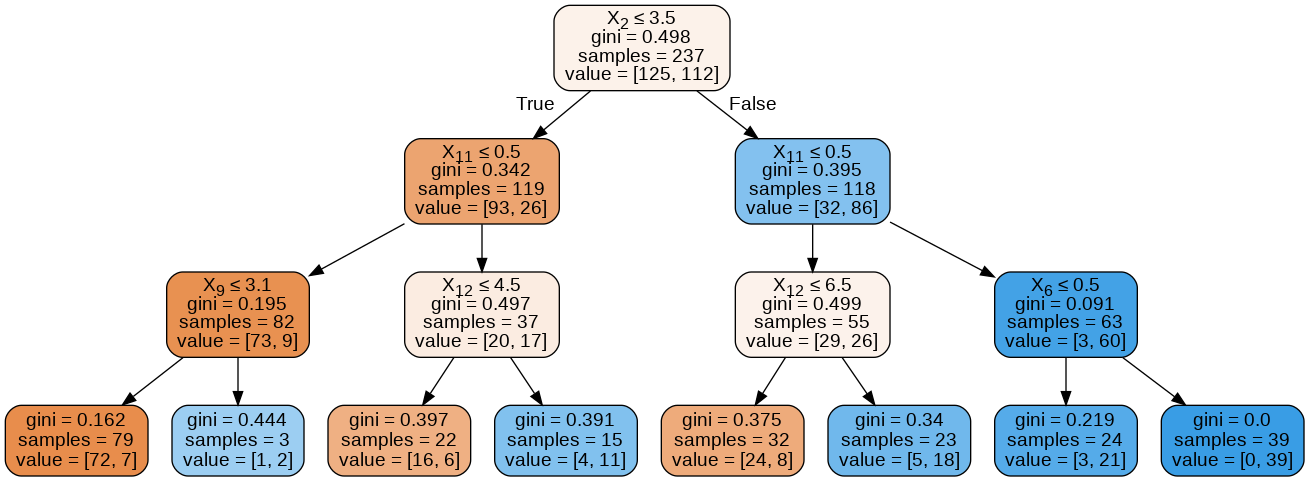

In [348]:
# Decision Tree
x = df.drop(df.columns[[13]],axis=1)
y  = df[df.columns[[13]]]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# use Grid Search Cross Validation (GridSearchCV) from 
# scikit to look for the best hyperparameter 

from sklearn.model_selection import GridSearchCV
from sklearn import tree 
import numpy as np

def dtree_grid_search(data, target, nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 10)}
    d_tree= tree.DecisionTreeClassifier()
    
    gridsearch = GridSearchCV(d_tree, param_grid, cv=nfolds)
    gridsearch.fit(data, target)
    return gridsearch.best_params_
print("Best hyperparameter for this case:",dtree_grid_search(x, y, 5))



# Decision Trees
decision_tree_entropy = tree.DecisionTreeClassifier(random_state=0, max_depth=3,criterion="gini")
decision_tree_entropy.fit(x_train,y_train)

y_predict = decision_tree_entropy.predict(x_test)

accuracy = decision_tree_entropy.score(x_test,y_test)

print('---------------------------')
print('Model A via Gini')
print('Accuracy of this decision tree is %.5f' %(accuracy))
print('---------------------------')

from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO 
from IPython.display import Image  
# https://pydotplus.readthedocs.io/ for generating generates a GraphViz representation of the decision tree.
import pydotplus 

dot_data = StringIO()
export_graphviz(decision_tree_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [349]:
# Random Forest
# import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
size = 20
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)

print('---------------------------')
print('Model B via Random Forest')
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 3
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 20
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 50
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 70
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 90
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 100
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))


size = 90
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 70
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 50
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 20
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 3
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

print('---------------------------')


---------------------------
Model B via Random Forest
Test Accuracy of this decision tree with size 20 is 0.85000. Training Accuracy is 0.99578.
Test Accuracy of this decision tree with size 3 is 0.78333. Training Accuracy is 0.97890.
Test Accuracy of this decision tree with size 20 is 0.90000. Training Accuracy is 0.98734.
Test Accuracy of this decision tree with size 50 is 0.88333. Training Accuracy is 1.00000.
Test Accuracy of this decision tree with size 70 is 0.88333. Training Accuracy is 1.00000.
Test Accuracy of this decision tree with size 90 is 0.86667. Training Accuracy is 1.00000.
Test Accuracy of this decision tree with size 100 is 0.83333. Training Accuracy is 1.00000.
Test Accuracy of this decision tree with size 90 is 0.86667. Training Accuracy is 1.00000.
Test Accuracy of this decision tree with size 70 is 0.86667. Training Accuracy is 1.00000.
Test Accuracy of this decision tree with size 50 is 0.83333. Training Accuracy is 1.00000.
Test Accuracy of this decision tree 

In [350]:
# Neural Network
# Solver: sgd

from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


size = 3
mlp1 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp1.fit(x_train, y_train.values.ravel());
print('---------------------------')
print('Model C is via Neural Network')
print('Test accuracy for Neural Network with %d Neurons alpha=0.1 is %.5f. Training accuracy is %.5f. '%(size,mlp1.score(x_test,y_test),mlp1.score(x_train,y_train)))

size = 7
mlp2 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp2.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=0.1 is %.5f. Training accuracy is %.5f. '%(size,mlp2.score(x_test,y_test),mlp2.score(x_train,y_train)))

size = 13
mlp3 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp3.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=0.1 is %.5f. Training accuracy is %.5f. '%(size,mlp3.score(x_test,y_test),mlp3.score(x_train,y_train)))

size = 21
mlp4 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp4.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=0.1 is %.5f. Training accuracy is %.5f. '%(size,mlp4.score(x_test,y_test),mlp4.score(x_train,y_train)))
print('---------------------------')

size = 3
mlp4_2 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp4_2.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=1 is %.5f. Training accuracy is %.5f. '%(size,mlp4_2.score(x_test,y_test),mlp4_2.score(x_train,y_train)))

size = 3
mlp5 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp5.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=0.1 is %.5f. Training accuracy is %.5f. '%(size,mlp5.score(x_test,y_test),mlp5.score(x_train,y_train)))

size = 3
mlp6 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.01,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp6.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=0.01 is %.5f. Training accuracy is %.5f. '%(size,mlp6.score(x_test,y_test),mlp6.score(x_train,y_train)))

size = 3
mlp7 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.001,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp7.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=0.001 is %.5f. Training accuracy is %.5f. '%(size,mlp7.score(x_test,y_test),mlp7.score(x_train,y_train)))


---------------------------
Model C is via Neural Network
Test accuracy for Neural Network with 3 Neurons alpha=0.1 is 0.58333. Training accuracy is 0.52743. 
Test accuracy for Neural Network with 7 Neurons alpha=0.1 is 0.73333. Training accuracy is 0.62025. 
Test accuracy for Neural Network with 13 Neurons alpha=0.1 is 0.58333. Training accuracy is 0.52321. 
Test accuracy for Neural Network with 21 Neurons alpha=0.1 is 0.41667. Training accuracy is 0.47679. 
---------------------------
Test accuracy for Neural Network with 3 Neurons alpha=1 is 0.58333. Training accuracy is 0.52743. 
Test accuracy for Neural Network with 3 Neurons alpha=0.1 is 0.58333. Training accuracy is 0.52743. 
Test accuracy for Neural Network with 3 Neurons alpha=0.01 is 0.68333. Training accuracy is 0.69620. 
Test accuracy for Neural Network with 3 Neurons alpha=0.001 is 0.40000. Training accuracy is 0.49789. 


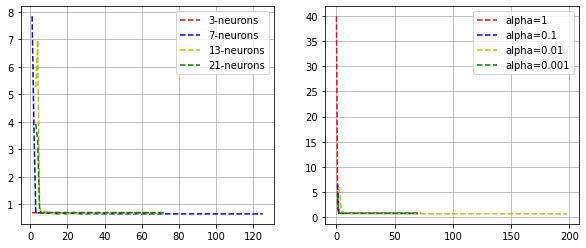

In [351]:
fig, axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(mlp1.loss_curve_,'r--', label='3-neurons')
axs[0].plot(mlp2.loss_curve_,'b--',label='7-neurons')
axs[0].plot(mlp3.loss_curve_,'y--',label='13-neurons')
axs[0].plot(mlp4.loss_curve_,'g--',label='21-neurons')
axs[0].grid('True')
axs[0].legend()

axs[1].plot(mlp4_2.loss_curve_, 'r--' , label='alpha=1')
axs[1].plot(mlp5.loss_curve_, 'b--' , label='alpha=0.1')
axs[1].plot(mlp6.loss_curve_, 'y--' , label='alpha=0.01')
axs[1].plot(mlp7.loss_curve_, 'g--' , label='alpha=0.001')

axs[1].grid('True')
axs[1].legend()

Saving dataset4.txt to dataset4 (35).txt
Best hyperparameter for this case: {'criterion': 'gini', 'max_depth': 5}
---------------------------
Model A via Gini
Test Accuracy of this decision tree is 0.80000
Training Accuracy of this decision tree is 0.93750
---------------------------


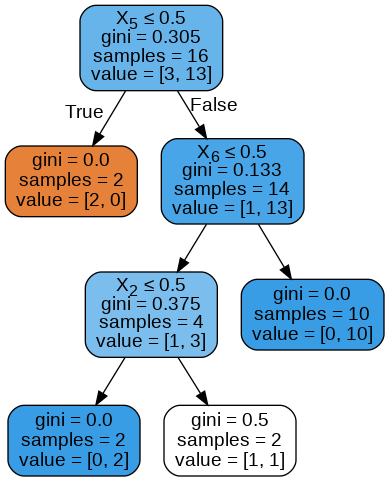

In [352]:
# #Second questsion

import pandas as pd
from google.colab import files
second_file = files.upload()

df = pd.read_csv('dataset4.txt',header=None)
x = df.drop(df.columns[[0,6,7,8,9,12]],axis=1)
df = df.dropna()
# Decision Tree
y  = df[df.columns[[12]]]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# use Grid Search Cross Validation (GridSearchCV) from 
# scikit to look for the best hyperparameter 

from sklearn.model_selection import GridSearchCV
from sklearn import tree 
import numpy as np

def dtree_grid_search(data, target, nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 10)}
    d_tree= tree.DecisionTreeClassifier()
    
    gridsearch = GridSearchCV(d_tree, param_grid, cv=nfolds)
    gridsearch.fit(data, target)
    return gridsearch.best_params_
print("Best hyperparameter for this case:",dtree_grid_search(x, y, 3))



# Decision Trees
decision_tree_entropy = tree.DecisionTreeClassifier(random_state=0, max_depth=3,criterion="gini")
x_train


decision_tree_entropy.fit(x_train,y_train.values.ravel())

y_predict = decision_tree_entropy.predict(x_test)

accuracy = decision_tree_entropy.score(x_test,y_test)

print('---------------------------')
print('Model A via Gini')
print('Test Accuracy of this decision tree is %.5f' %(accuracy))
print('Training Accuracy of this decision tree is %.5f' %(decision_tree_entropy.score(x_train,y_train)))

print('---------------------------')

from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO 
from IPython.display import Image  
# https://pydotplus.readthedocs.io/ for generating generates a GraphViz representation of the decision tree.
import pydotplus 

dot_data = StringIO()
export_graphviz(decision_tree_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



In [353]:
# Random Forest
# import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
size = 20
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)

print('---------------------------')
print('Model B via Random Forest')
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 3
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 20
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 50
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 70
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 90
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 100
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))


size = 90
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 70
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 50
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 20
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

size = 3
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train.values.ravel())
accuracy = model.score(x_test,y_test)
print('Test Accuracy of this decision tree with size %d is %.5f. Training Accuracy is %.5f.' %(size, accuracy,model.score(x_train,y_train)))

print('---------------------------')


---------------------------
Model B via Random Forest
Test Accuracy of this decision tree with size 20 is 0.80000. Training Accuracy is 0.93750.
Test Accuracy of this decision tree with size 3 is 1.00000. Training Accuracy is 0.93750.
Test Accuracy of this decision tree with size 20 is 0.80000. Training Accuracy is 1.00000.
Test Accuracy of this decision tree with size 50 is 0.80000. Training Accuracy is 1.00000.
Test Accuracy of this decision tree with size 70 is 0.80000. Training Accuracy is 1.00000.
Test Accuracy of this decision tree with size 90 is 0.80000. Training Accuracy is 1.00000.
Test Accuracy of this decision tree with size 100 is 0.80000. Training Accuracy is 1.00000.
Test Accuracy of this decision tree with size 90 is 0.80000. Training Accuracy is 1.00000.
Test Accuracy of this decision tree with size 70 is 0.80000. Training Accuracy is 1.00000.
Test Accuracy of this decision tree with size 50 is 0.80000. Training Accuracy is 1.00000.
Test Accuracy of this decision tree 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:1326: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 4 instead of 5).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

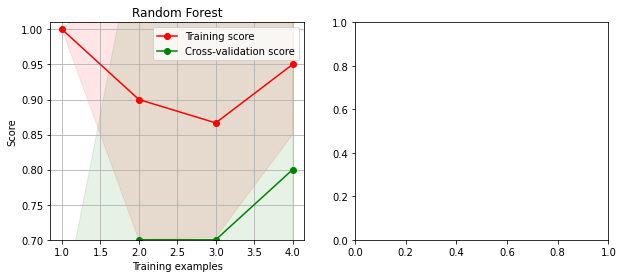

In [354]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # # Plot n_samples vs fit_times
    # axes[1].grid()
    # axes[1].plot(train_sizes, fit_times_mean, 'o-')
    # axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
    #                      fit_times_mean + fit_times_std, alpha=0.1)
    # axes[1].set_xlabel("Training examples")
    # axes[1].set_ylabel("fit_times")
    # axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    # axes[2].grid()
    # axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    # axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
    #                      test_scores_mean + test_scores_std, alpha=0.1)
    # axes[2].set_xlabel("fit_times")
    # axes[2].set_ylabel("Score")
    # axes[2].set_title("Performance of the model")

    return plt

fig, axs = plt.subplots(1,2,figsize=(10,4))
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model, "Random Forest",x_test, y_test, axs[0:1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [355]:
# Neural Network
# Solver: sgd

from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


size = 3
mlp1 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp1.fit(x_train, y_train.values.ravel());
print('---------------------------')
print('Model C is via Neural Network')
print('Test accuracy for Neural Network with %d Neurons alpha=0.1 is %.5f. Training accuracy is %.5f. '%(size,mlp1.score(x_test,y_test),mlp1.score(x_train,y_train)))

size = 7
mlp2 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp2.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=0.1 is %.5f. Training accuracy is %.5f. '%(size,mlp2.score(x_test,y_test),mlp2.score(x_train,y_train)))

size = 13
mlp3 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp3.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=0.1 is %.5f. Training accuracy is %.5f. '%(size,mlp3.score(x_test,y_test),mlp3.score(x_train,y_train)))

size = 21
mlp4 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp4.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=0.1 is %.5f. Training accuracy is %.5f. '%(size,mlp4.score(x_test,y_test),mlp4.score(x_train,y_train)))
print('---------------------------')

size = 3
mlp4_2 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp4_2.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=1 is %.5f. Training accuracy is %.5f. '%(size,mlp4_2.score(x_test,y_test),mlp4_2.score(x_train,y_train)))

size = 3
mlp5 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp5.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=0.1 is %.5f. Training accuracy is %.5f. '%(size,mlp5.score(x_test,y_test),mlp5.score(x_train,y_train)))

size = 3
mlp6 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.01,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp6.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=0.01 is %.5f. Training accuracy is %.5f. '%(size,mlp6.score(x_test,y_test),mlp6.score(x_train,y_train)))

size = 3
mlp7 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.001,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp7.fit(x_train, y_train.values.ravel());
print('Test accuracy for Neural Network with %d Neurons alpha=0.001 is %.5f. Training accuracy is %.5f. '%(size,mlp7.score(x_test,y_test),mlp7.score(x_train,y_train)))


---------------------------
Model C is via Neural Network
Test accuracy for Neural Network with 3 Neurons alpha=0.1 is 0.60000. Training accuracy is 0.93750. 
Test accuracy for Neural Network with 7 Neurons alpha=0.1 is 0.60000. Training accuracy is 0.87500. 
Test accuracy for Neural Network with 13 Neurons alpha=0.1 is 0.60000. Training accuracy is 0.93750. 
Test accuracy for Neural Network with 21 Neurons alpha=0.1 is 0.60000. Training accuracy is 0.93750. 
---------------------------
Test accuracy for Neural Network with 3 Neurons alpha=1 is 0.60000. Training accuracy is 0.93750. 
Test accuracy for Neural Network with 3 Neurons alpha=0.1 is 0.60000. Training accuracy is 0.81250. 
Test accuracy for Neural Network with 3 Neurons alpha=0.01 is 0.60000. Training accuracy is 0.93750. 
Test accuracy for Neural Network with 3 Neurons alpha=0.001 is 0.60000. Training accuracy is 0.93750. 


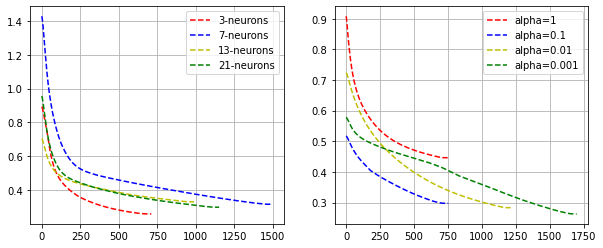

In [356]:

fig, axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(mlp1.loss_curve_,'r--', label='3-neurons')
axs[0].plot(mlp2.loss_curve_,'b--',label='7-neurons')
axs[0].plot(mlp3.loss_curve_,'y--',label='13-neurons')
axs[0].plot(mlp4.loss_curve_,'g--',label='21-neurons')
axs[0].grid('True')
axs[0].legend()

axs[1].plot(mlp4_2.loss_curve_, 'r--' , label='alpha=1')
axs[1].plot(mlp5.loss_curve_, 'b--' , label='alpha=0.1')
axs[1].plot(mlp6.loss_curve_, 'y--' , label='alpha=0.01')
axs[1].plot(mlp7.loss_curve_, 'g--' , label='alpha=0.001')

axs[1].grid('True')
axs[1].legend()